# Check why run crashes at end of 1859

```
  ===>>> : E R R O R

          ===========

   stp_ctl: |ssh| > 20 m  or  |U| > 10 m/s  or  S <= 0  or  S >= 100  or  NaN encounter in the tests

 kt 232744 |ssh| max   6.231     at i j      1 452     MPI rank 729
 kt 232744 |U|   max   13.57     at i j k 1439 452  53 MPI rank 786
 kt 232744 Sal   min   30.19     at i j k  717 242   1 MPI rank 186
 kt 232744 Sal   max   35.27     at i j k  357 281  18 MPI rank 239
```

In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.utils import fix_lon_range, convert_to_teos10
from nemo_python_git.forcing import find_cesm2_file
import cmocean

In [40]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

### Look at output abort

Does the model not properly recognize that the boundary is periodic?
Check: l_Iperio, l_Jperio (lateral global domain b.c.: i- j-periodicity)

Also check whether the direction of the velocities are correct

In [49]:
oa = xr.open_dataset(f'{base_folder}output/CESM2-LE2_ens1011.001/files/output.abort_0786.nc')
#vozocrtx, vomecrty, vovecrtz

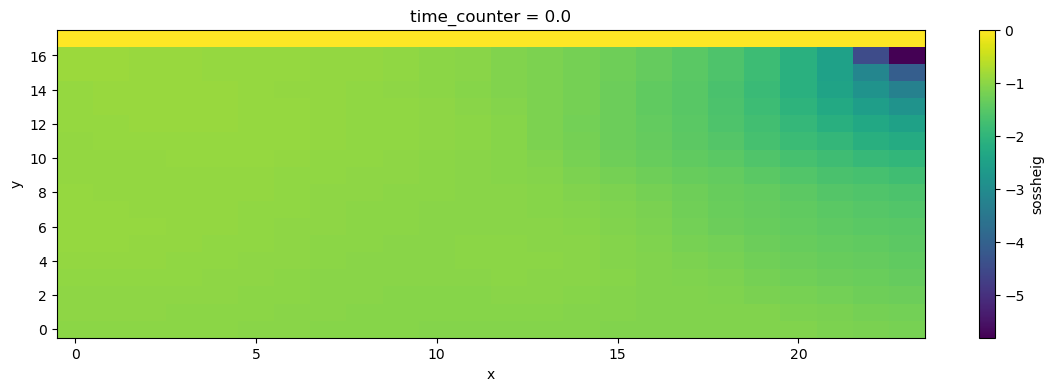

In [61]:
oa.isel(time_counter=0).sossheig.plot(figsize=(14,4))

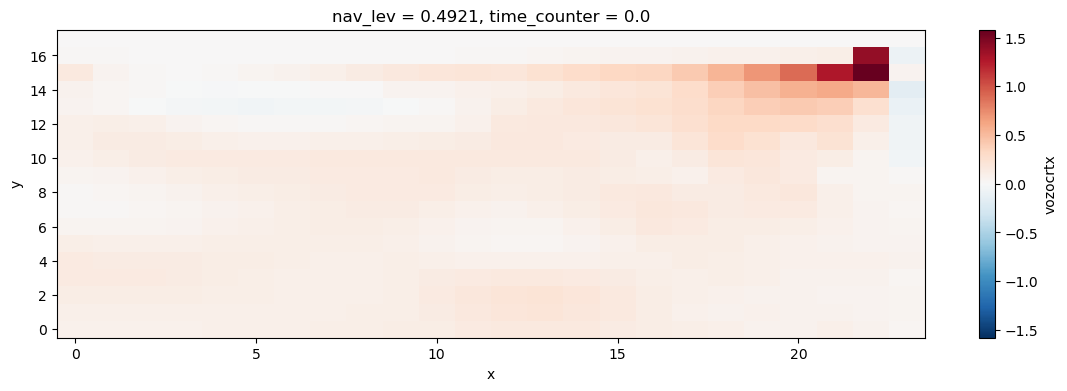

In [65]:
oa.isel(time_counter=0,nav_lev=0).vozocrtx.plot(figsize=(14,4))

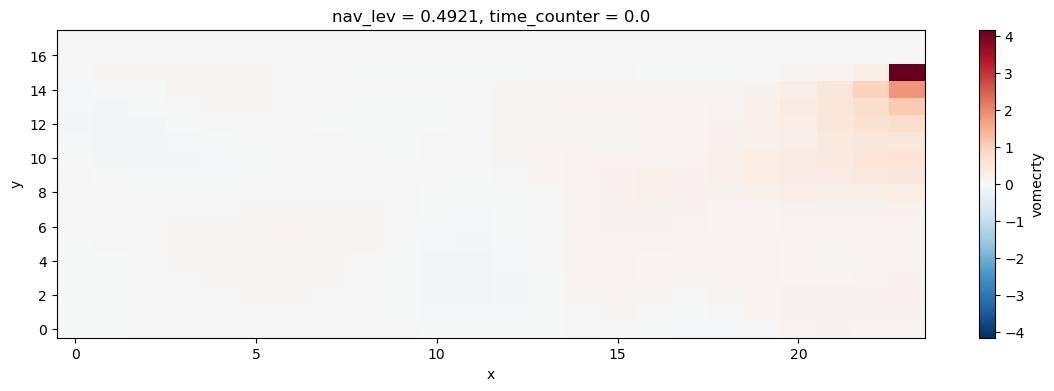

In [66]:
oa.isel(time_counter=0,nav_lev=0).vomecrty.plot(figsize=(14,4))

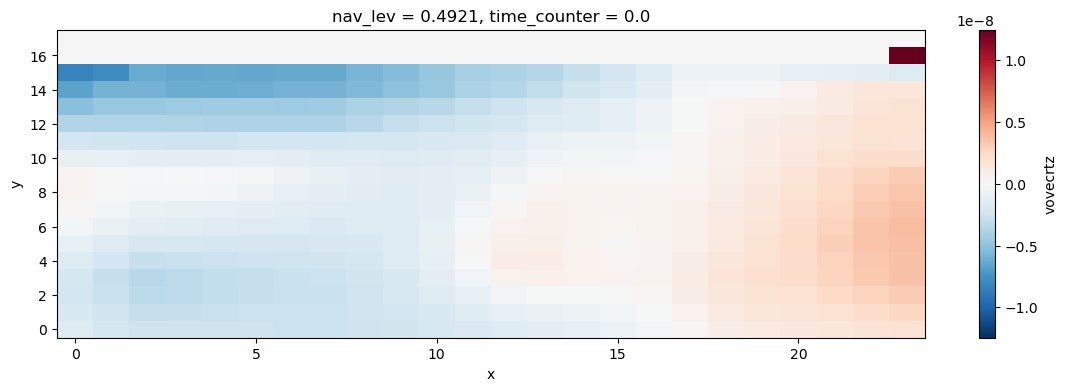

In [67]:
oa.isel(time_counter=0,nav_lev=0).vovecrtz.plot(figsize=(14,4))

In [71]:
oa.votemper.max() ## maybe the issue is one temperature of 9999 that isn't getting masked???

<xarray.DataArray 'votemper' ()> Size: 8B
array(45.53169461)

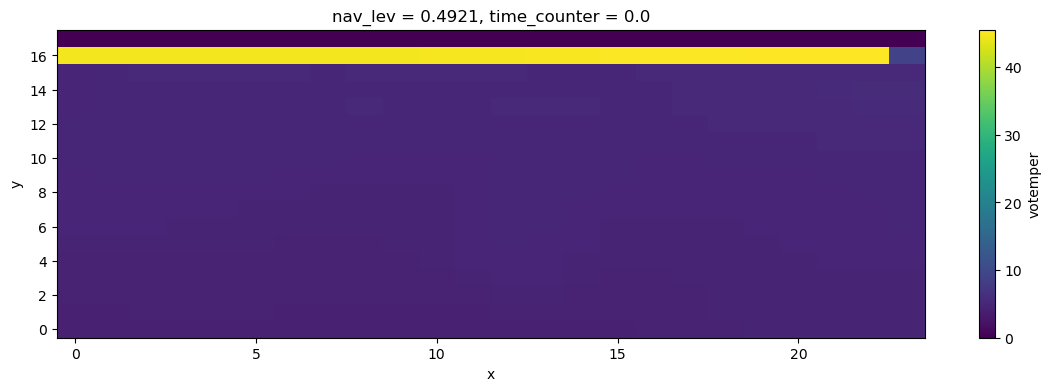

In [56]:
oa.isel(time_counter=0,nav_lev=0).votemper.plot(figsize=(14,4))

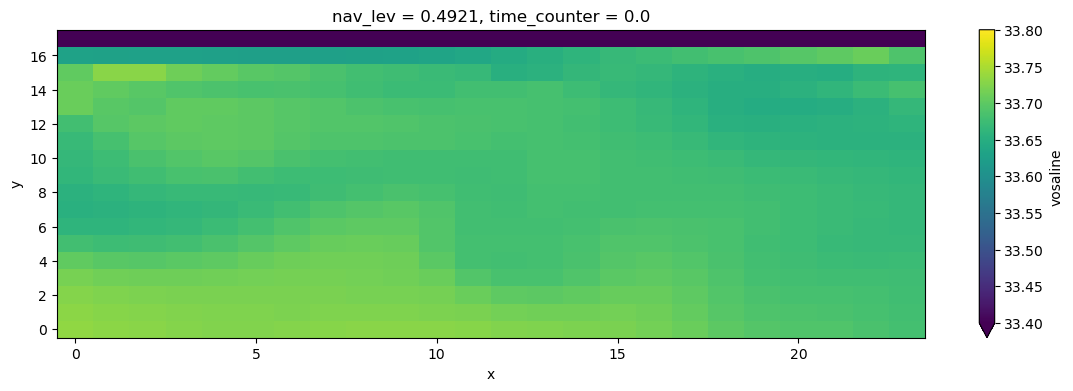

In [76]:
oa.isel(time_counter=0,nav_lev=0).vosaline.plot(figsize=(14,4), vmin=33.4, vmax=33.8)

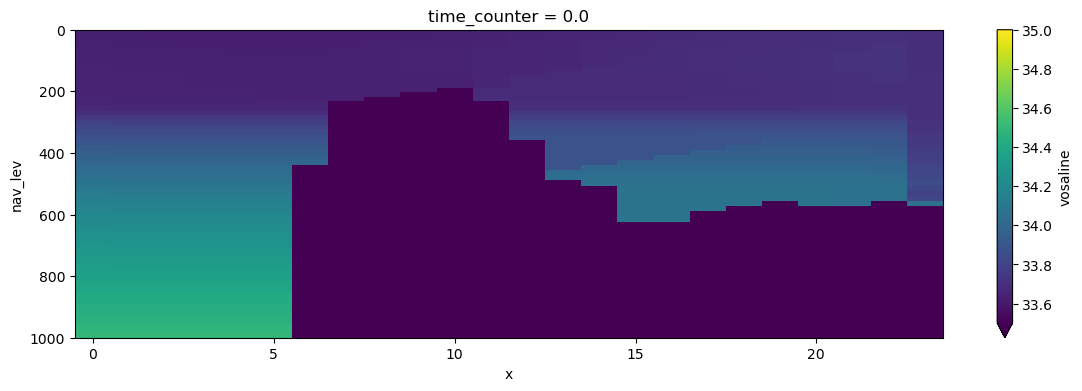

In [81]:
oa.isel(time_counter=0,y=-2).vosaline.plot(figsize=(14,4),ylim=(1000,0), vmin=33.5, vmax=35)

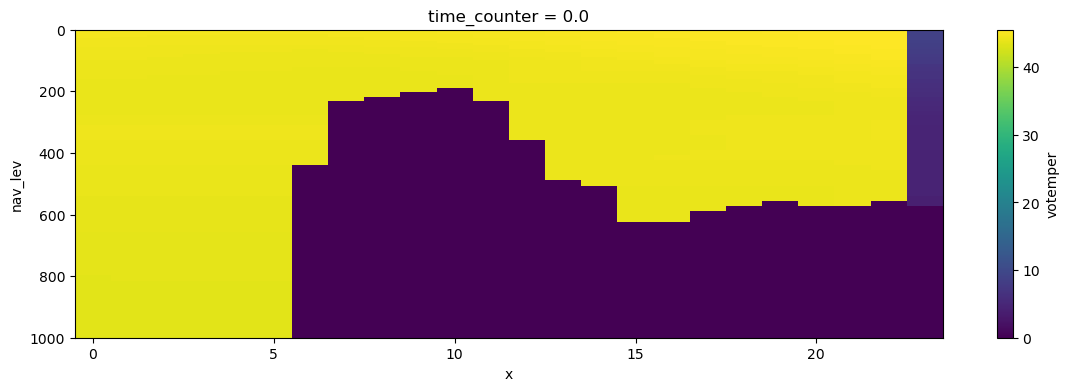

In [77]:
oa.isel(time_counter=0,y=-2).votemper.plot(figsize=(14,4),ylim=(1000,0))

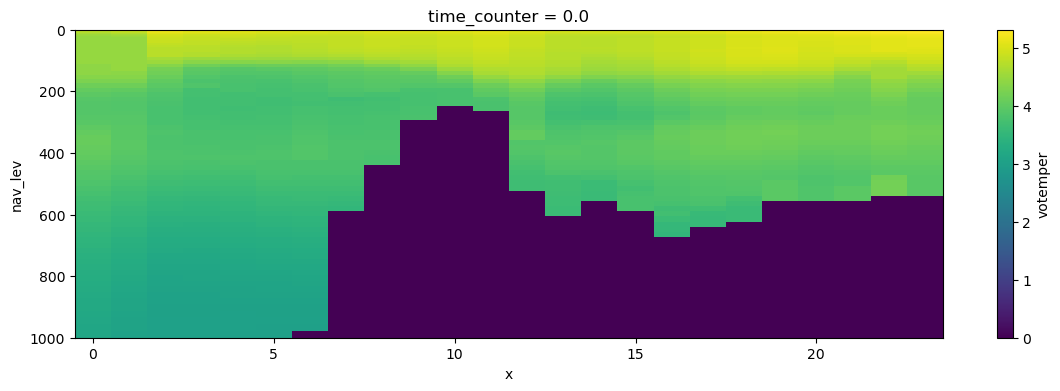

In [64]:
oa.isel(time_counter=0,y=-3).votemper.plot(figsize=(14,4),ylim=(1000,0))

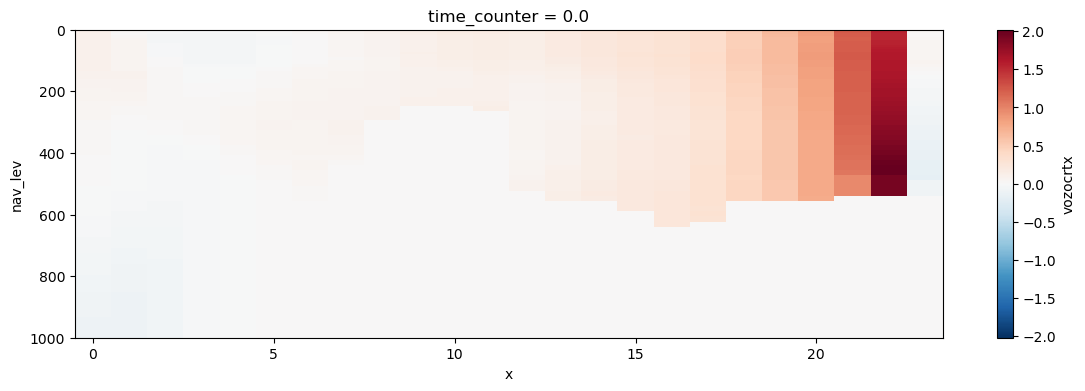

In [68]:
oa.isel(time_counter=0,y=-3).vozocrtx.plot(figsize=(14,4),ylim=(1000,0))

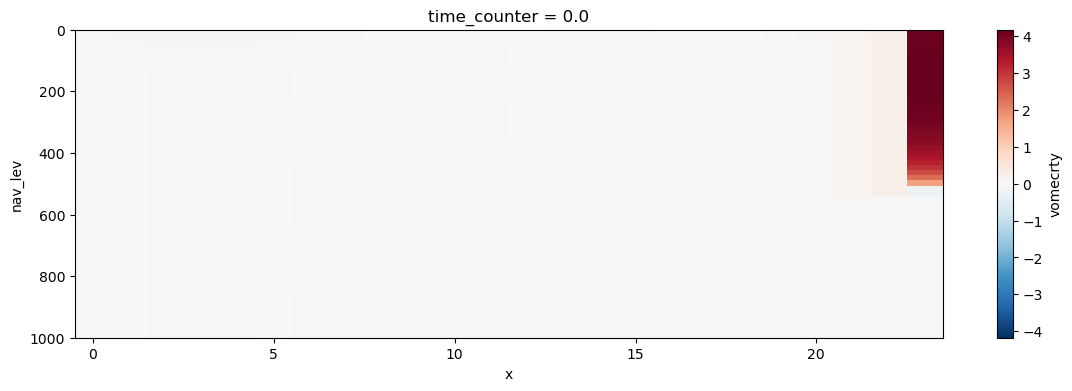

In [69]:
oa.isel(time_counter=0,y=-3).vomecrty.plot(figsize=(14,4),ylim=(1000,0))

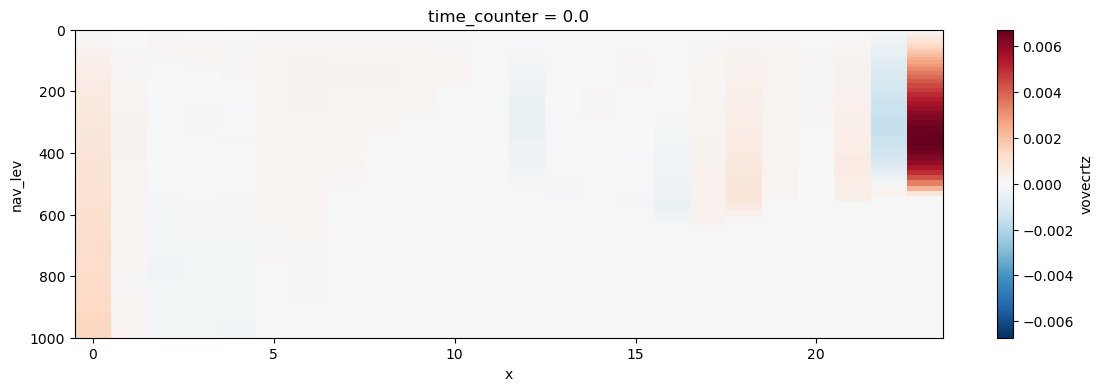

In [70]:
oa.isel(time_counter=0,y=-3).vovecrtz.plot(figsize=(14,4),ylim=(1000,0))

### Look at boundary condition and run results side by side

In [20]:
year=1850
# year=1979

# exp='CESM2-LE2_ens1011.001'
exp='CESM2-test4'

# velocity divergence issue (identified by w velocity) at 1459 --> 0 also existed in my initial runs
# dsW = xr.open_dataset(f'{base_folder}output/ERA5_test6/files/eANT025.L121_1m_{year}0101_{year}1231_grid_W.nc')
dsT = xr.open_dataset(f'{base_folder}output/{exp}/files/eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
dsU = xr.open_dataset(f'{base_folder}output/{exp}/files/eANT025.L121_1m_{year}0101_{year}1231_grid_U.nc')
dsV = xr.open_dataset(f'{base_folder}output/{exp}/files/eANT025.L121_1m_{year}0101_{year}1231_grid_V.nc')
dsW = xr.open_dataset(f'{base_folder}output/{exp}/files/eANT025.L121_1m_{year}0101_{year}1231_grid_W.nc')

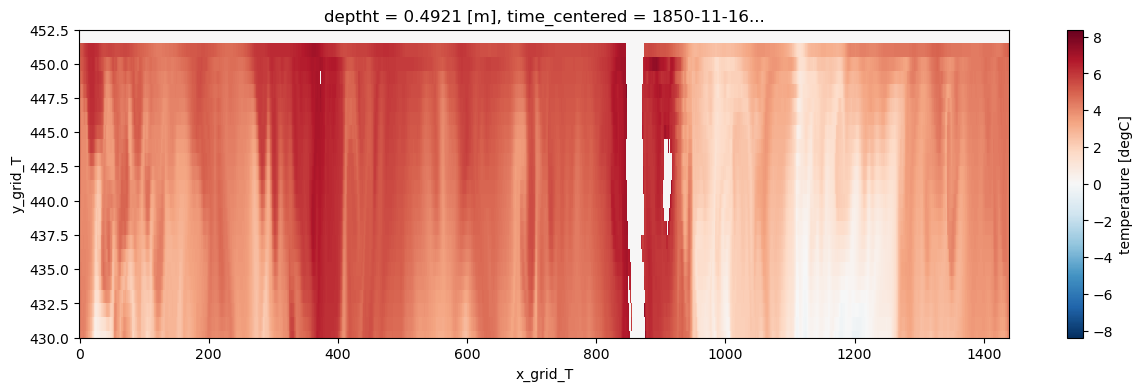

In [14]:
dsT.thetao.isel(time_counter=10, deptht=0).plot(figsize=(15,4), ylim=(430, None))

In [21]:
# old boundary conditions
o11 = xr.open_dataset(f'{base_folder}boundary-conditions/B-SOSE/SOSE-Uvel-boundary-conditions-20240507_m11.nc').isel(time_counter=0,y=0)

# new boundary conditions
u11 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_UVEL_y1859m11.nc').isel(time_counter=0,y=0)
u12 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_UVEL_y1859m12.nc').isel(time_counter=0,y=0)
u01 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_UVEL_y1860m01.nc').isel(time_counter=0,y=0)

v11 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_VVEL_y1859m11.nc').isel(time_counter=0,y=0)
v12 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_VVEL_y1859m12.nc').isel(time_counter=0,y=0)
v01 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_VVEL_y1860m01.nc').isel(time_counter=0,y=0)

T11 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_ConsTemp_y1859m11.nc').isel(time_counter=0,y=0)
T12 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_ConsTemp_y1859m12.nc').isel(time_counter=0,y=0)
T01 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_ConsTemp_y1860m01.nc').isel(time_counter=0,y=0)

S11 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_AbsSal_y1859m11.nc').isel(time_counter=0,y=0)
S12 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_AbsSal_y1859m12.nc').isel(time_counter=0,y=0)
S01 = xr.open_dataset(f'{base_folder}boundary-conditions/CESM2/LE2/CESM2-LE2_ens1011.001_BCs_AbsSal_y1860m01.nc').isel(time_counter=0,y=0)

In [22]:
o11 = o11.assign(deptht=(('deptht'), dsU.depthu.values))

In [23]:
u11 = u11.assign(deptht=(('deptht'), dsU.depthu.values))
u12 = u12.assign(deptht=(('deptht'), dsU.depthu.values))
u01 = u01.assign(deptht=(('deptht'), dsU.depthu.values))
v11 = v11.assign(deptht=(('deptht'), dsV.depthv.values))
v12 = v12.assign(deptht=(('deptht'), dsV.depthv.values))
v01 = v01.assign(deptht=(('deptht'), dsV.depthv.values))
T11 = T11.assign(deptht=(('deptht'), dsT.deptht.values))
T12 = T12.assign(deptht=(('deptht'), dsT.deptht.values))
T01 = T01.assign(deptht=(('deptht'), dsT.deptht.values))
S11 = S11.assign(deptht=(('deptht'), dsT.deptht.values))
S12 = S12.assign(deptht=(('deptht'), dsT.deptht.values))
S01 = S01.assign(deptht=(('deptht'), dsT.deptht.values))

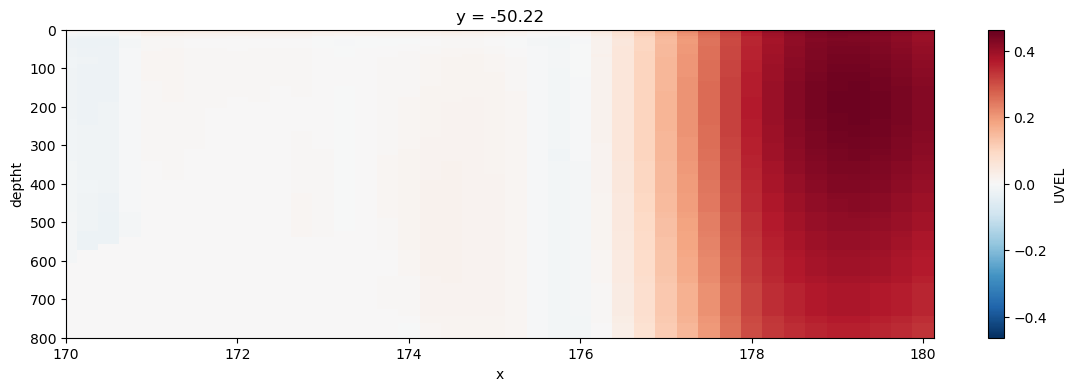

In [95]:
o11.UVEL.sortby('x').plot(figsize=(14,4), ylim=(800,0), xlim=(170, None))

In [20]:
ds = xr.open_dataset(f'{base_folder}output/simple-eANT025-testg/files/eANT025.L121_1d_19790101_19791231_grid_T_19790101-19790101.nc')

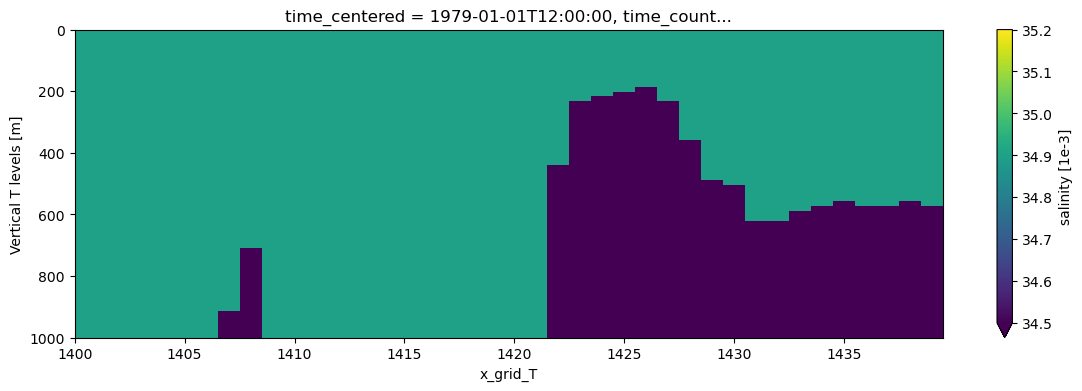

In [27]:
ds['so'].isel(time_counter=0, y_grid_T=-2).plot(figsize=(14,4), xlim=(1400, None), vmin=34.5, vmax=35.2, ylim=(1000,0))

Notes:
- Boundary condition wrapping seems to have an issue (the boundary condition files themselves look superficially okay, or at least the velocity files, still need to check the temperature, salinity files)
- Instability occurs at these edges so is likely the issue
- My present-day experiment also has this issue
- Land masking might have a slight issue in the boundary conditions (need to investigate)

Text(0.5, 1.0, 'Boundary condition')

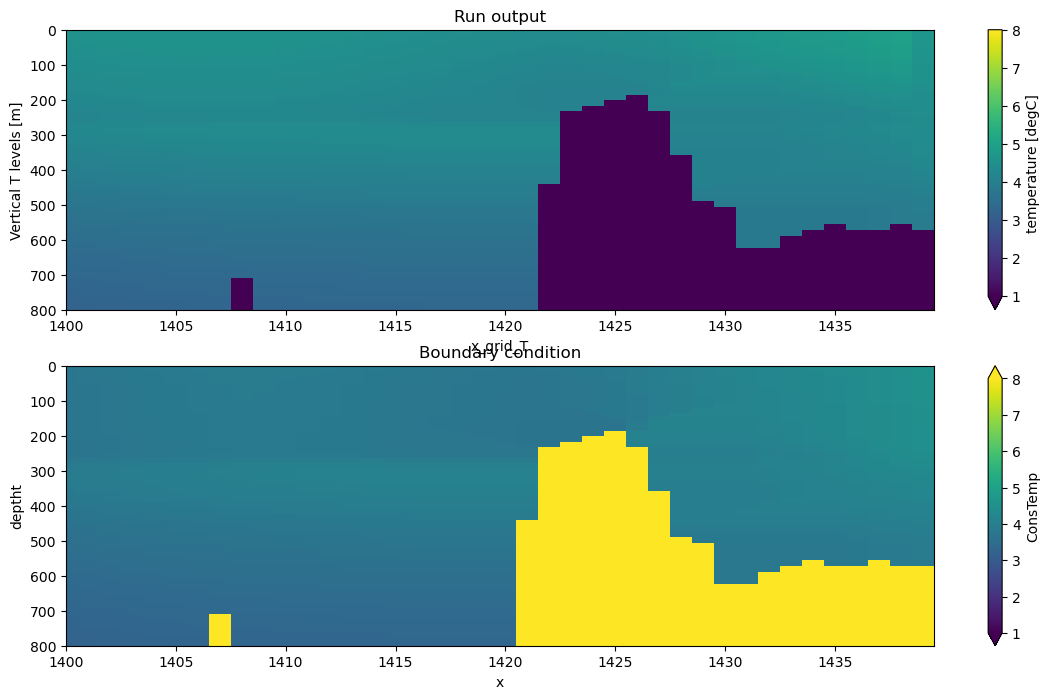

In [15]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0), 'vmin':1, 'vmax':8}
dsT.thetao.isel(y_grid_T=-2, time_counter=10).plot(ax=ax[0], **kwags)
T11['ConsTemp'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

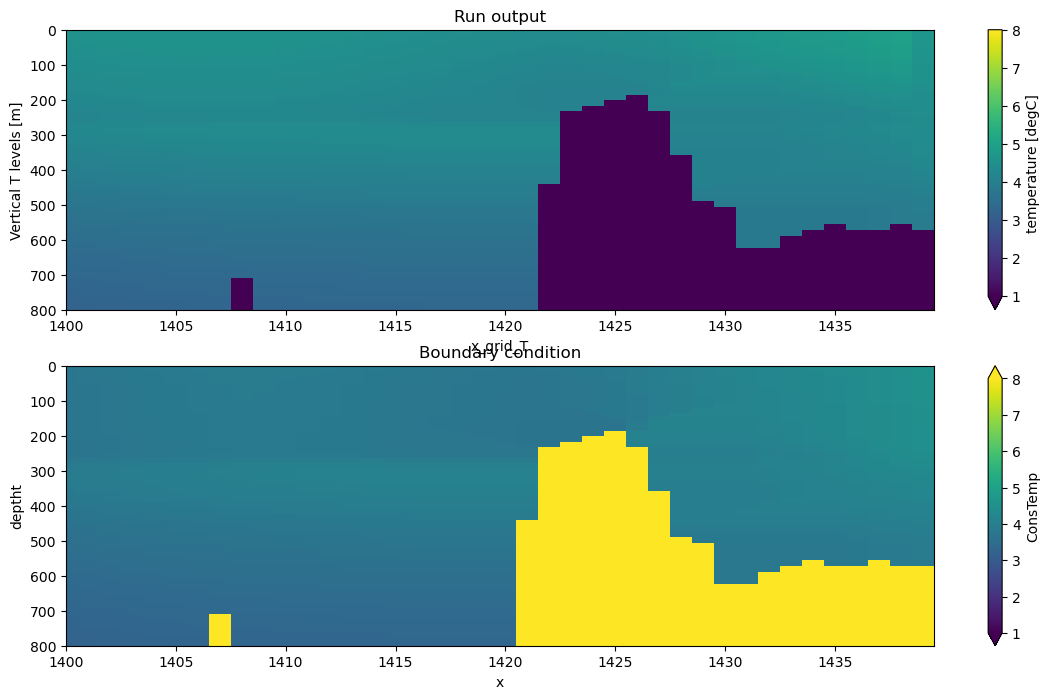

In [29]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0), 'vmin':1, 'vmax':8}
dsT.thetao.isel(y_grid_T=-2, time_counter=10).plot(ax=ax[0], **kwags)
T11['ConsTemp'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

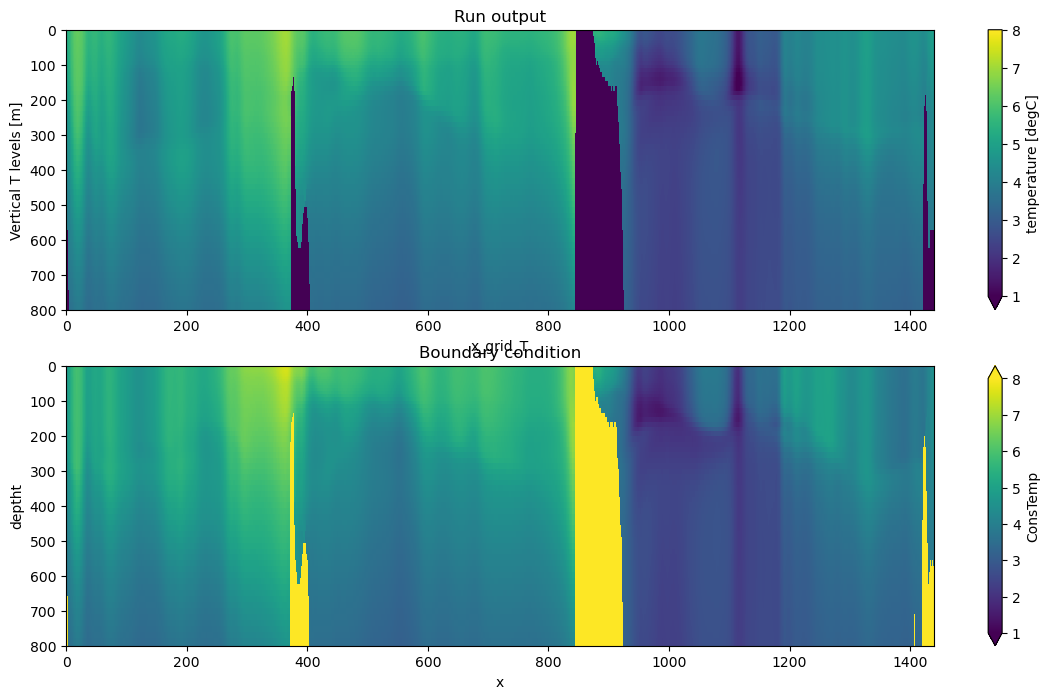

In [31]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'ylim':(800,0), 'vmin':1, 'vmax':8}
dsT.thetao.isel(y_grid_T=-2, time_counter=10).plot(ax=ax[0], **kwags)
T11['ConsTemp'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

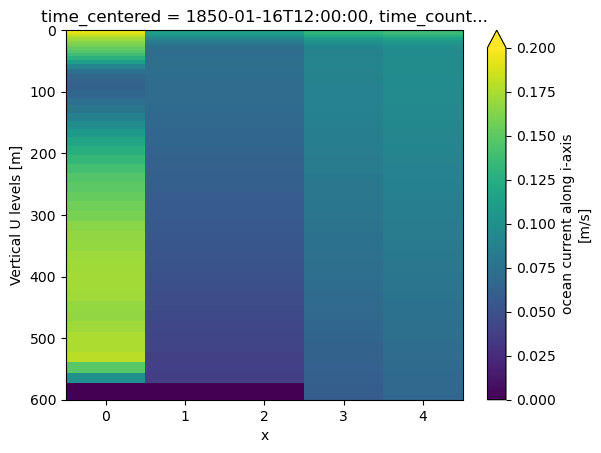

In [36]:
dsU.uo.isel(y=-2, time_counter=0, x=slice(0,5)).plot(ylim=(600,0), vmin=0, vmax=0.2)

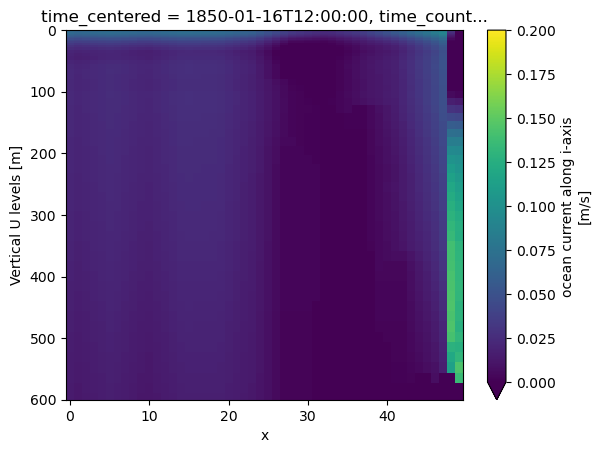

In [38]:
dsU.uo.isel(y=-2, time_counter=0, x=slice(-50,None)).plot(ylim=(600,0), vmin=0, vmax=0.2)

Text(0.5, 1.0, 'Boundary condition')

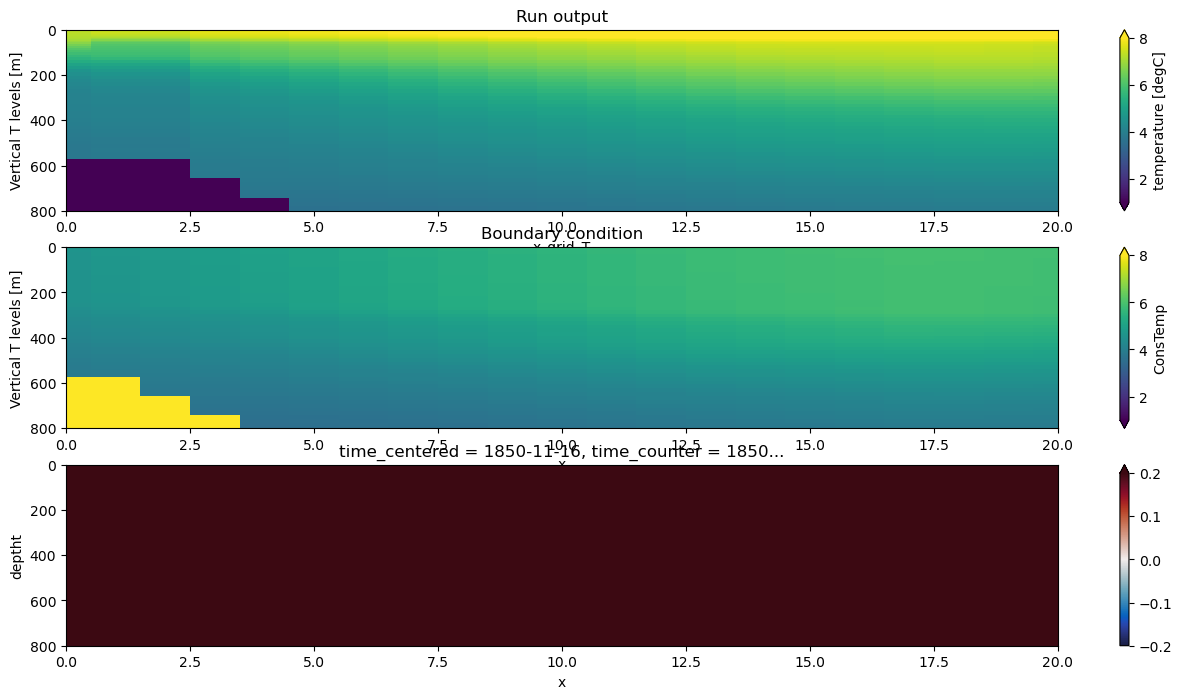

In [25]:
fig, ax = plt.subplots(3,1, figsize=(16,8))

kwags={'vmin':1, 'vmax':8}
kwag2={'ylim':(800,0), 'xlim':(0,20)}
dsT.thetao.isel(y_grid_T=-2, time_counter=0).plot(ax=ax[0], **kwags, **kwag2)
T11.assign({'deptht':dsT.deptht})['ConsTemp'].plot(ax=ax[1], **kwags, **kwag2)
(T11['ConsTemp'] - dsT.thetao.isel(y_grid_T=-2, time_counter=10).rename({'x_grid_T':'x'})).plot(ax=ax[2],vmin=-0.2,vmax=0.2, 
                                                                                                cmap=cmocean.cm.balance, **kwag2)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

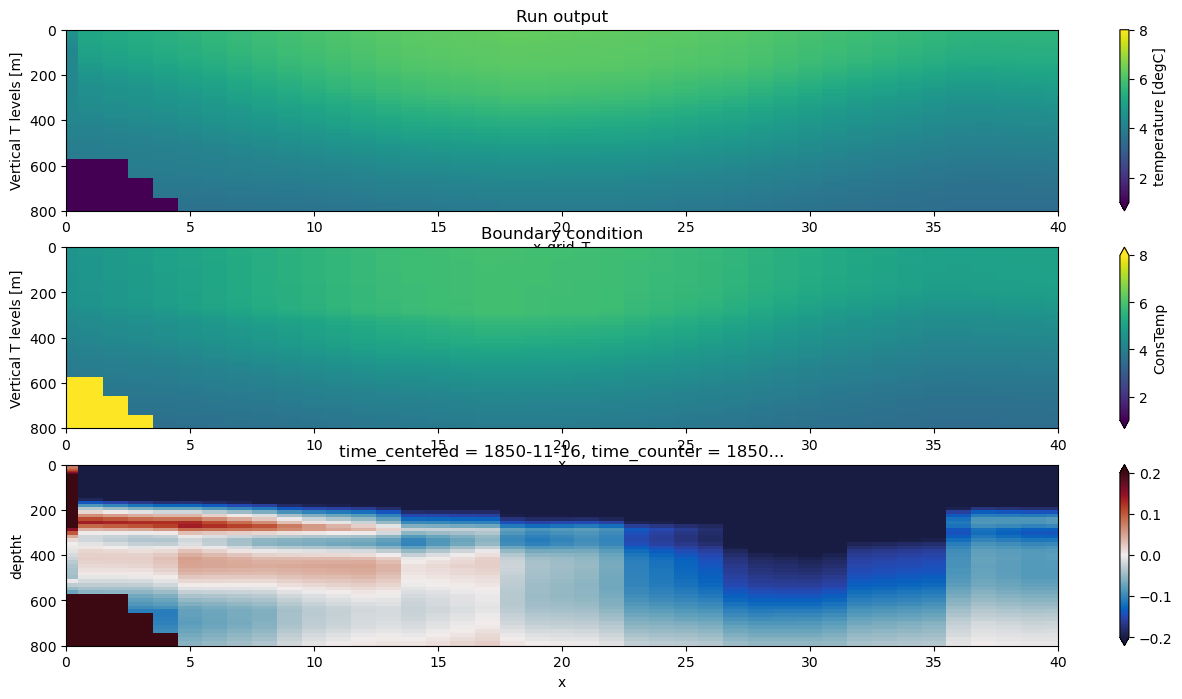

In [9]:
fig, ax = plt.subplots(3,1, figsize=(16,8))

kwags={'vmin':1, 'vmax':8}
kwag2={'ylim':(800,0), 'xlim':(0,40)}
dsT.thetao.isel(y_grid_T=-2, time_counter=10).plot(ax=ax[0], **kwags, **kwag2)
T11.assign({'deptht':dsT.deptht})['ConsTemp'].plot(ax=ax[1], **kwags, **kwag2)
(T11['ConsTemp'] - dsT.thetao.isel(y_grid_T=-2, time_counter=10).rename({'x_grid_T':'x'})).plot(ax=ax[2],vmin=-0.2,vmax=0.2, 
                                                                                                cmap=cmocean.cm.balance, **kwag2)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

What are the main differences between the boundary condition and the actual model values at the boundary? Looks like it is generally fairly similar, but there is some difference, possibly from flow into the boundary from within the domain?

Text(0.5, 1.0, 'Run output')

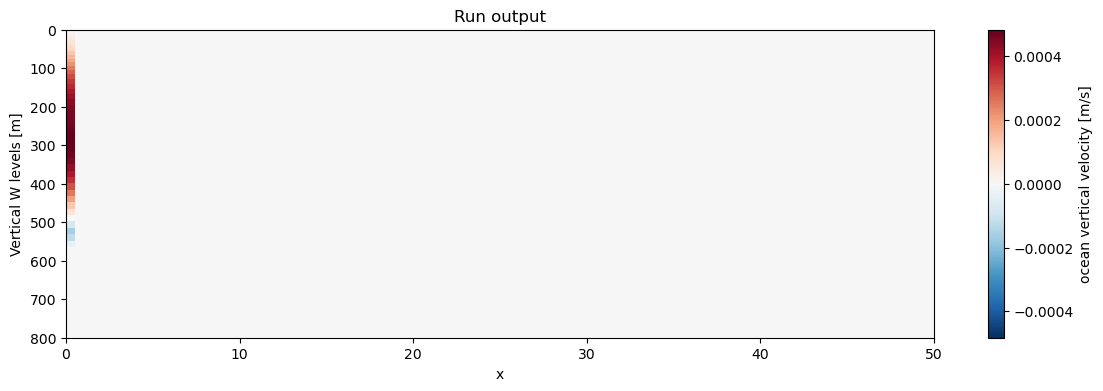

In [10]:
fig, ax = plt.subplots(1,1, figsize=(14,4))

kwags={'xlim':(0,50), 'ylim':(800,0)}
dsW.wo.isel(y=-2, time_counter=10).plot(**kwags)

ax.set_title('Run output')

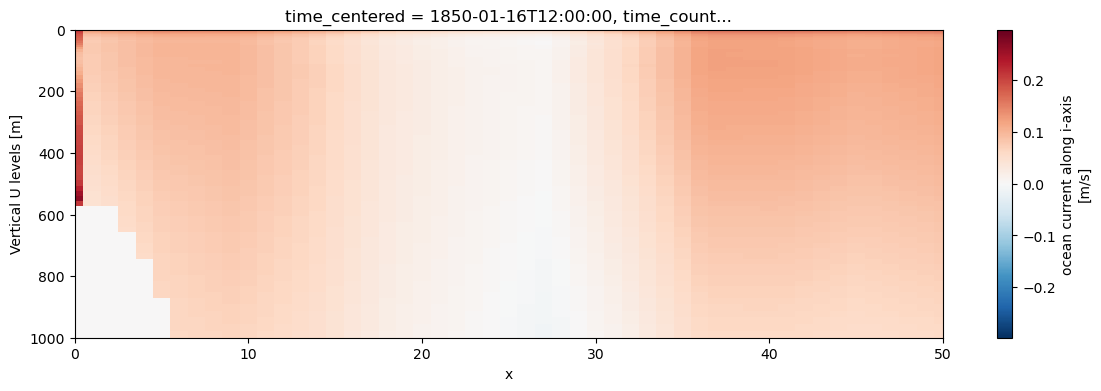

In [17]:
dsU.uo.isel(y=-2, time_counter=0).plot(figsize=(14,4), xlim=(0,50), ylim=(1000,0))

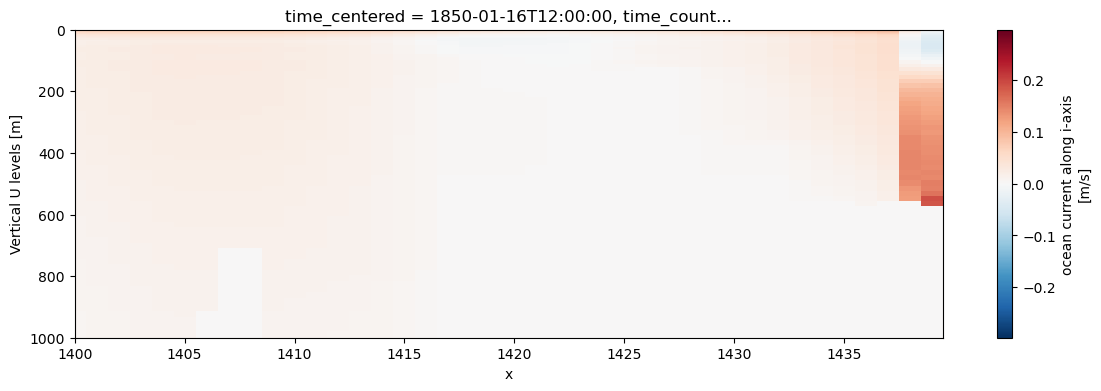

In [16]:
dsU.uo.isel(y=-2, time_counter=0).plot(figsize=(14,4), xlim=(1400,None), ylim=(1000,0))

Text(0.5, 1.0, 'Boundary condition')

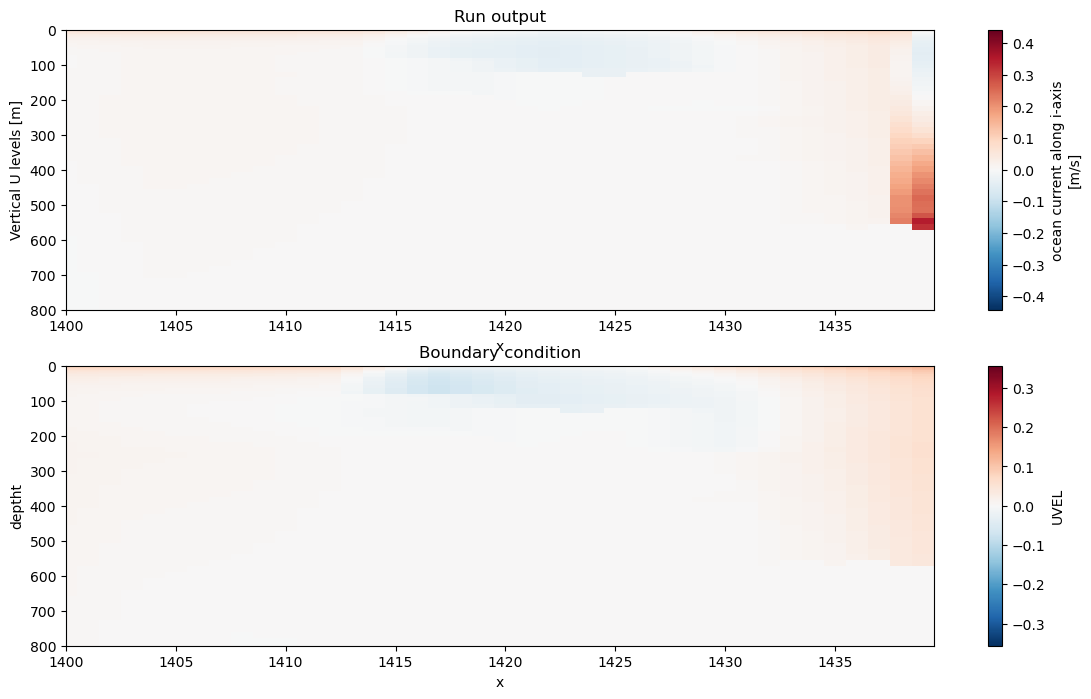

In [12]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
u11['UVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

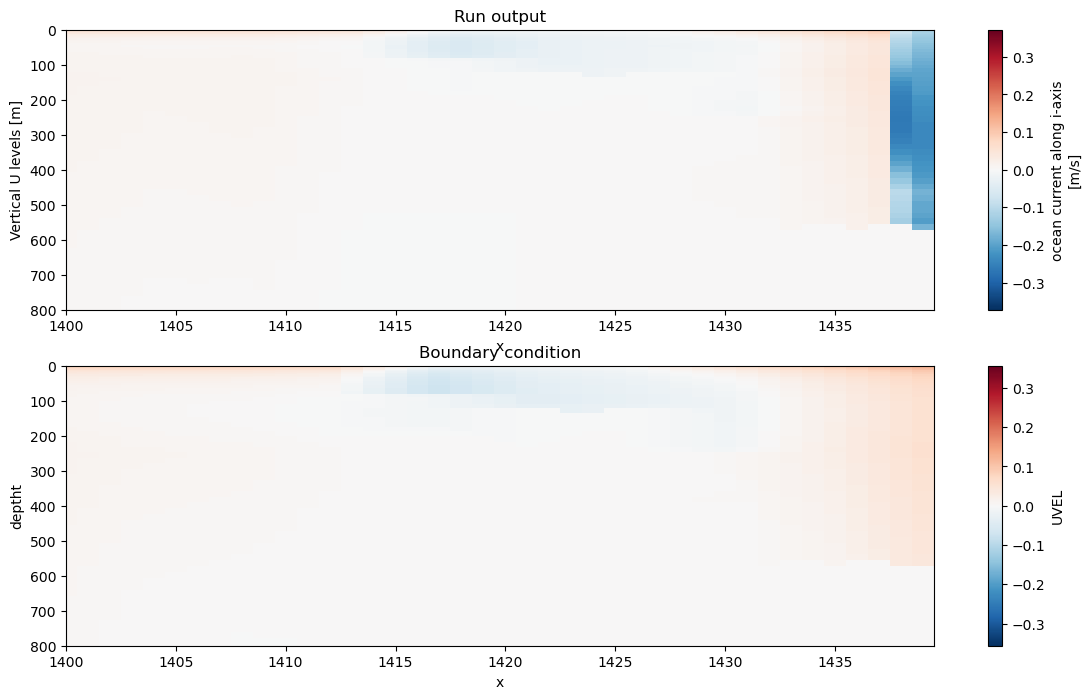

In [10]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
u11['UVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

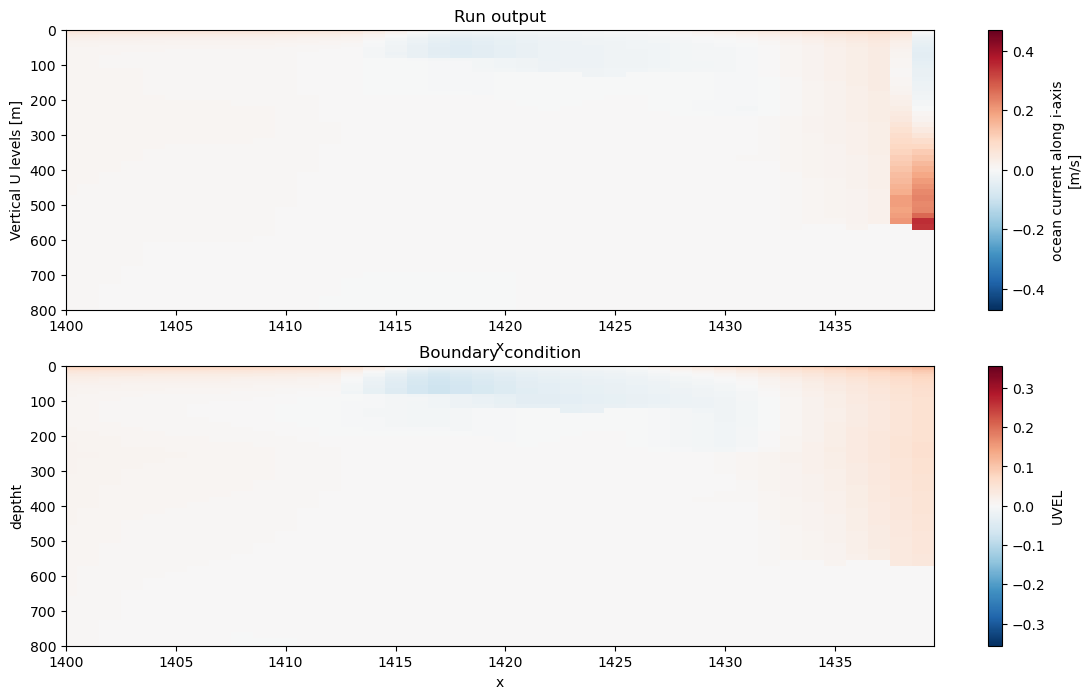

In [36]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
u11['UVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Difference between boundary condition and run output')

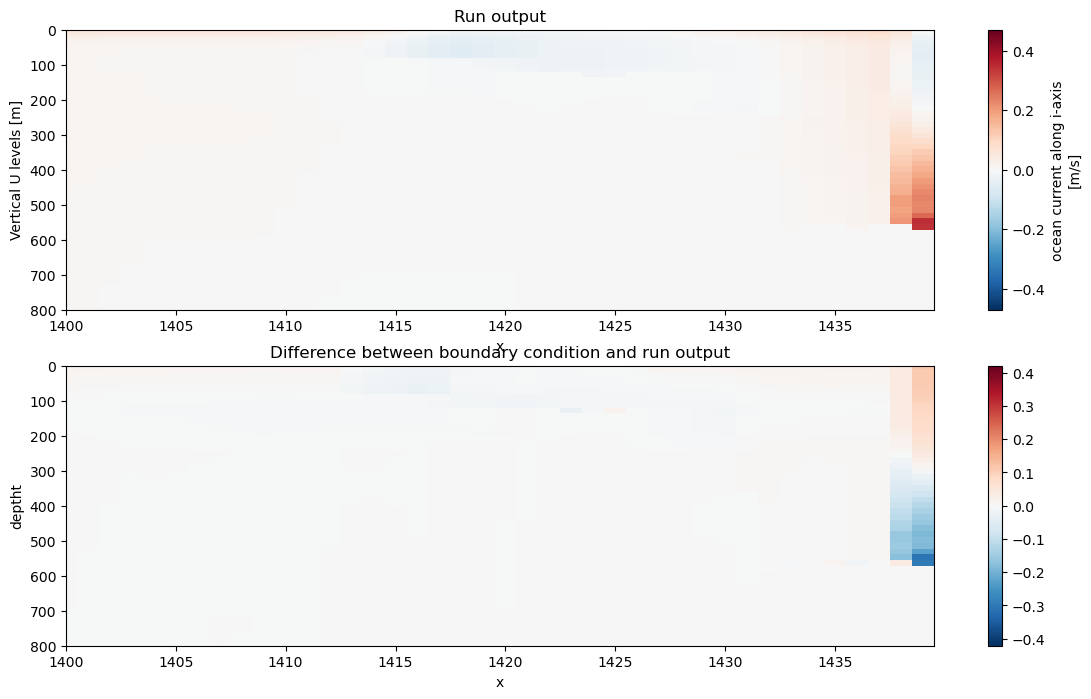

In [37]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
(u11['UVEL'] - dsU.uo.rename({'depthu':'deptht'}).isel(y=-2, time_counter=10)).plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Difference between boundary condition and run output')

Text(0.5, 1.0, 'Difference between boundary condition and run output')

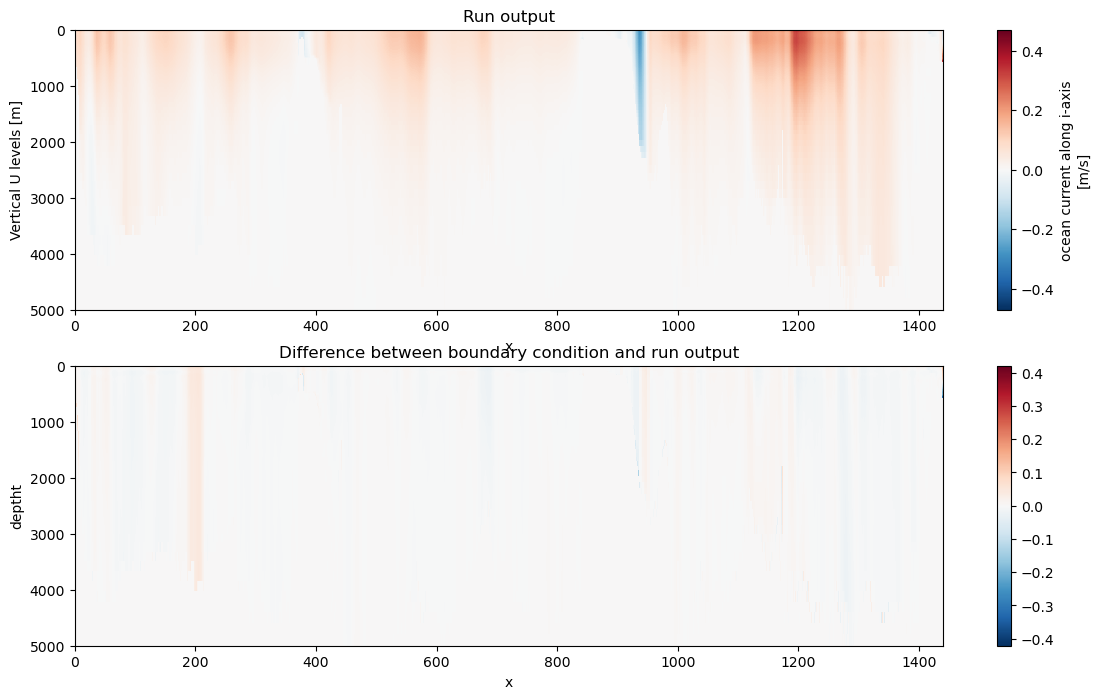

In [38]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(0,None), 'ylim':(5000,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
(u11['UVEL'] - dsU.uo.rename({'depthu':'deptht'}).isel(y=-2, time_counter=10)).plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Difference between boundary condition and run output')

Text(0.5, 1.0, 'Difference between boundary condition and run output')

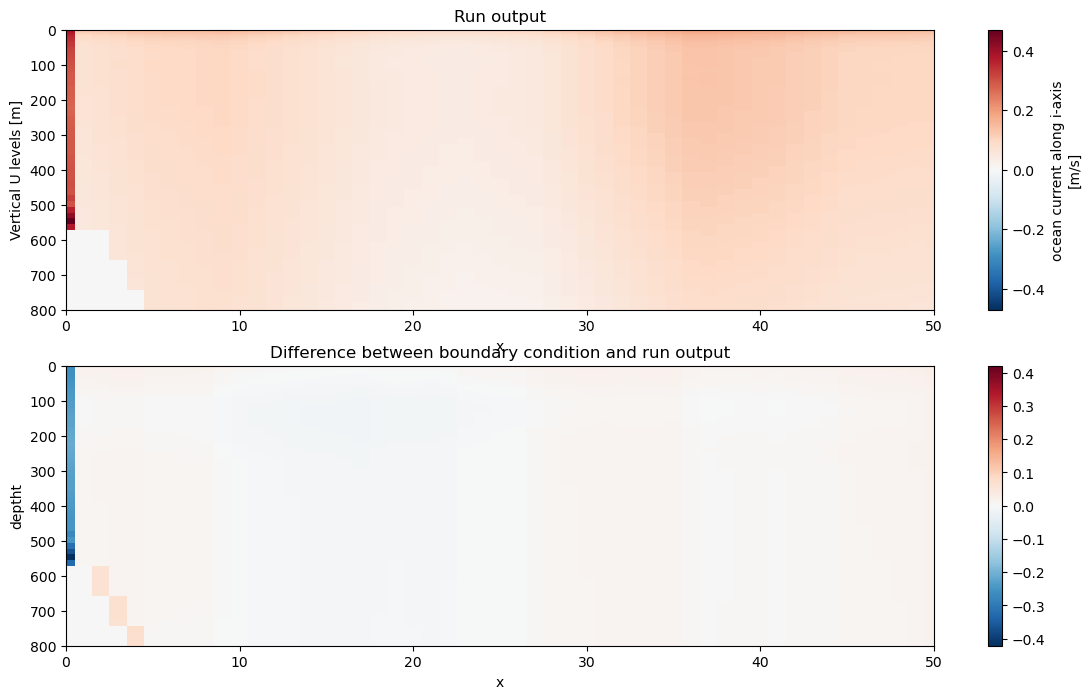

In [39]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(0,50), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
(u11['UVEL'] - dsU.uo.rename({'depthu':'deptht'}).isel(y=-2, time_counter=10)).plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Difference between boundary condition and run output')

Text(0.5, 1.0, 'Boundary condition')

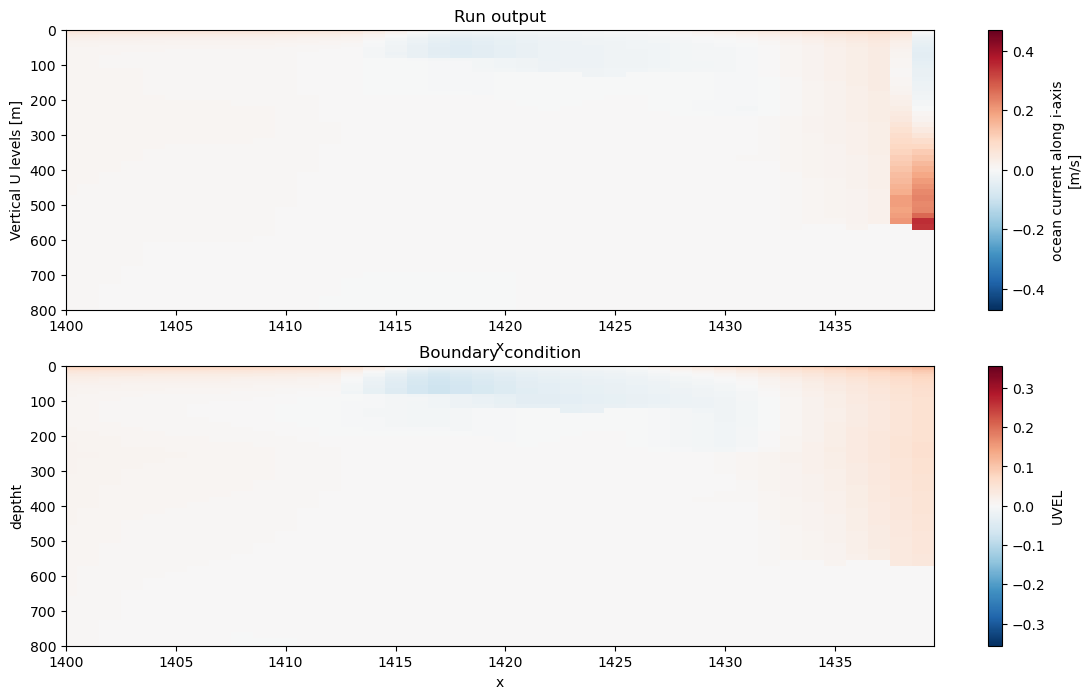

In [40]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
u11['UVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

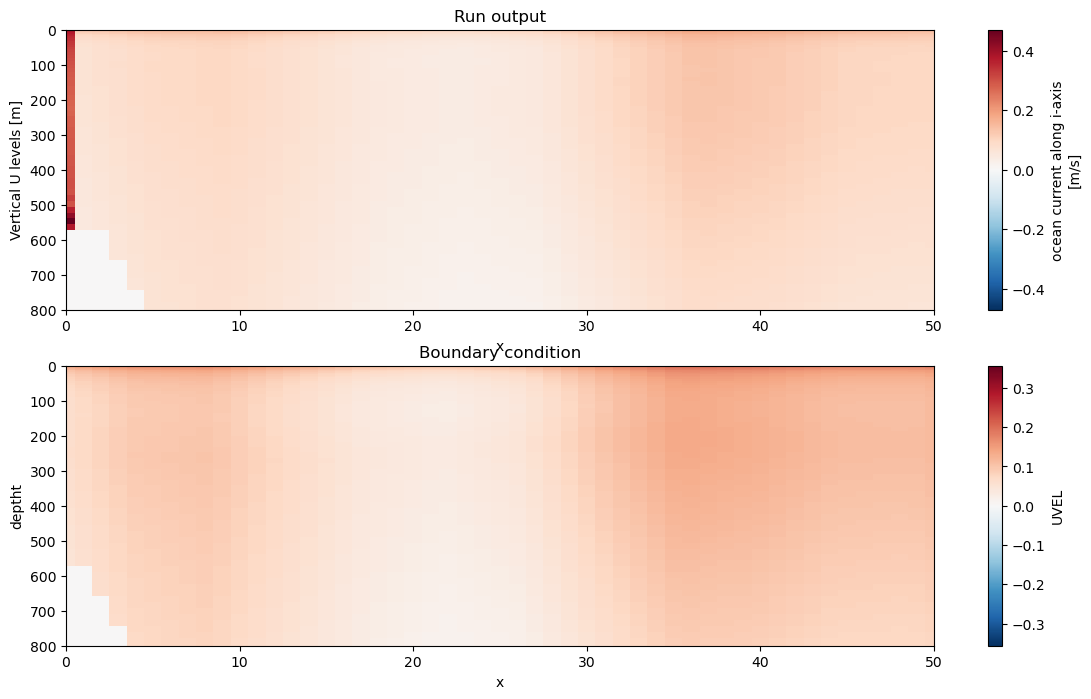

In [41]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(0,50), 'ylim':(800,0)}
dsU.uo.isel(y=-2, time_counter=10).plot(ax=ax[0], **kwags)
u11['UVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

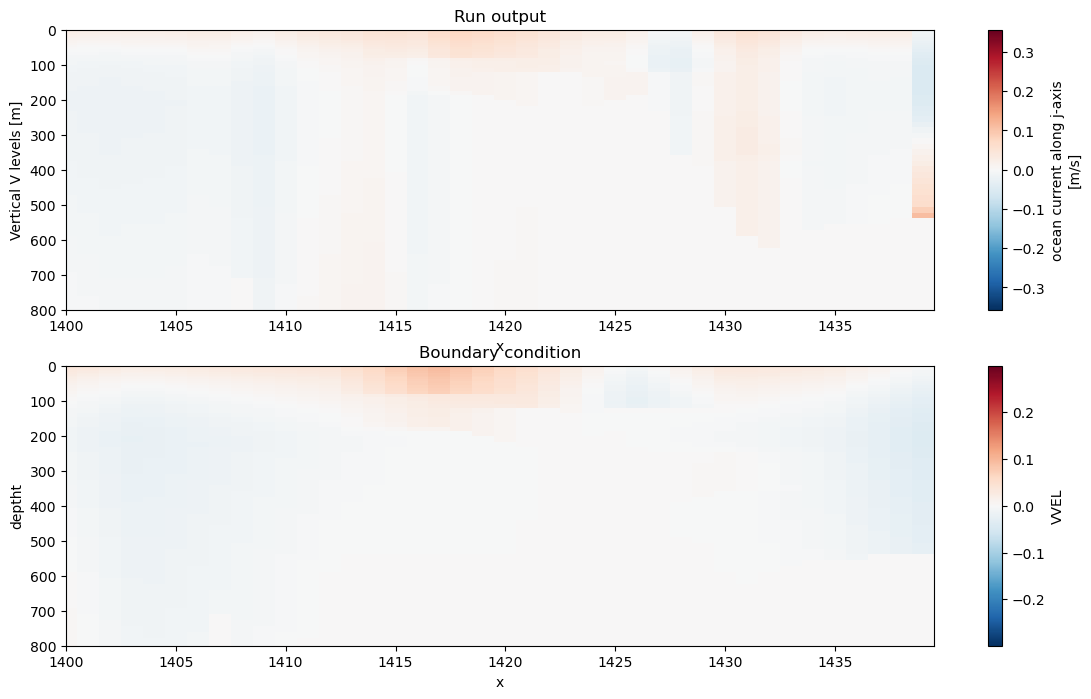

In [42]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsV.vo.isel(y=-3, time_counter=10).plot(ax=ax[0], **kwags)
v11['VVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Boundary condition')

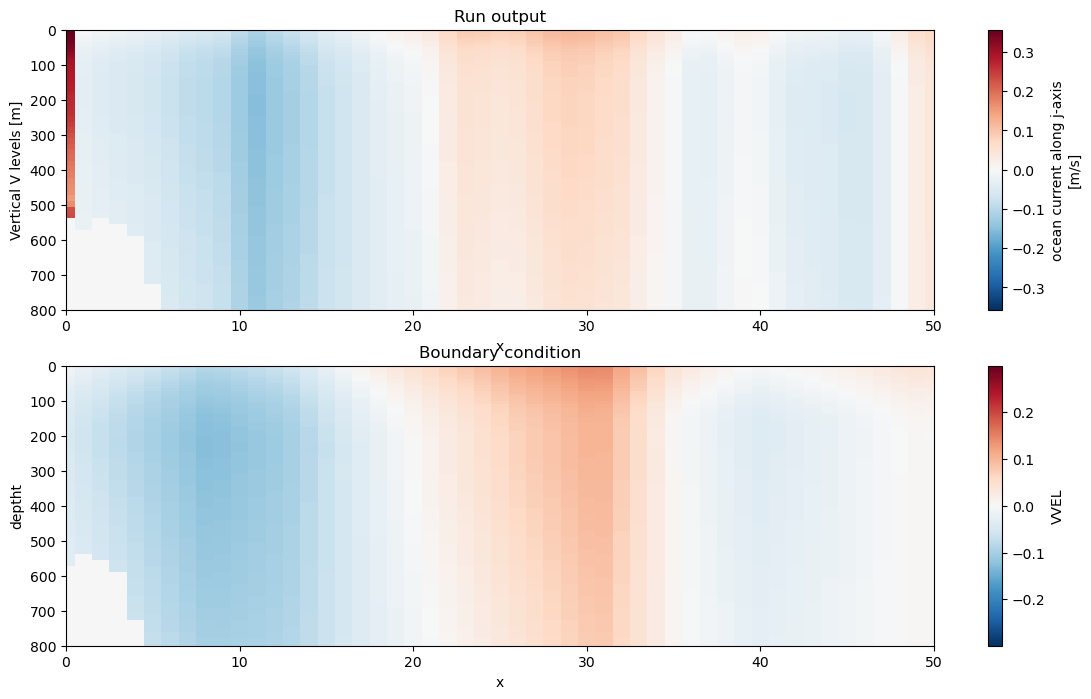

In [43]:
fig, ax = plt.subplots(2,1, figsize=(14,8))

kwags={'xlim':(0,50), 'ylim':(800,0)}
dsV.vo.isel(y=-3, time_counter=10).plot(ax=ax[0], **kwags)
v11['VVEL'].plot(ax=ax[1], **kwags)

ax[0].set_title('Run output')
ax[1].set_title('Boundary condition')

Text(0.5, 1.0, 'Run output')

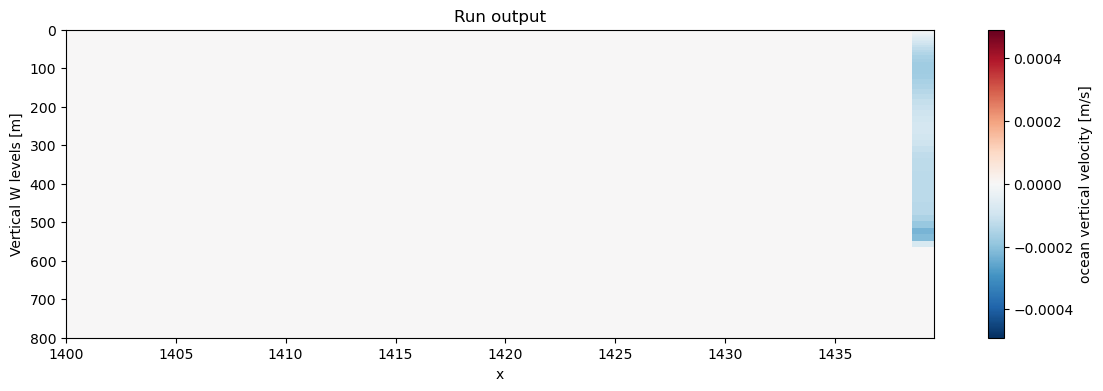

In [44]:
fig, ax = plt.subplots(1,1, figsize=(14,4))

kwags={'xlim':(1400,None), 'ylim':(800,0)}
dsW.wo.isel(y=-2, time_counter=10).plot(**kwags)

ax.set_title('Run output')

Text(0.5, 1.0, 'Run output')

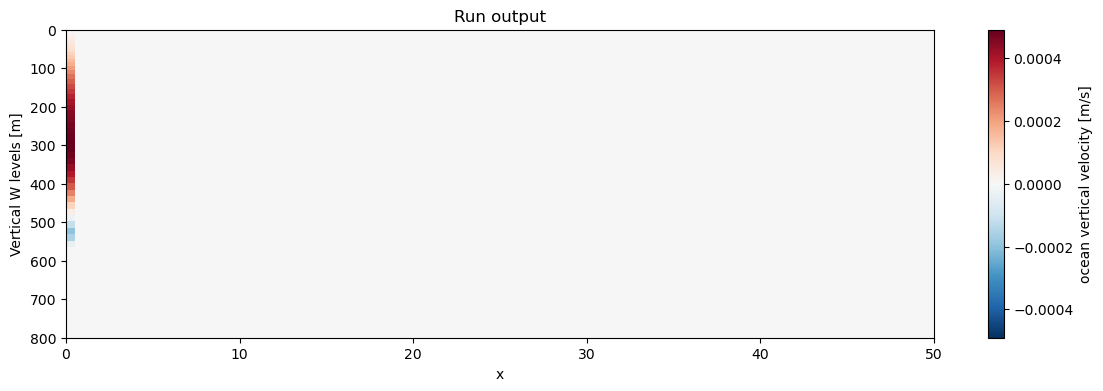

In [45]:
fig, ax = plt.subplots(1,1, figsize=(14,4))

kwags={'xlim':(0,50), 'ylim':(800,0)}
dsW.wo.isel(y=-2, time_counter=10).plot(**kwags)

ax.set_title('Run output')

Text(0.5, 1.0, 'Run output')

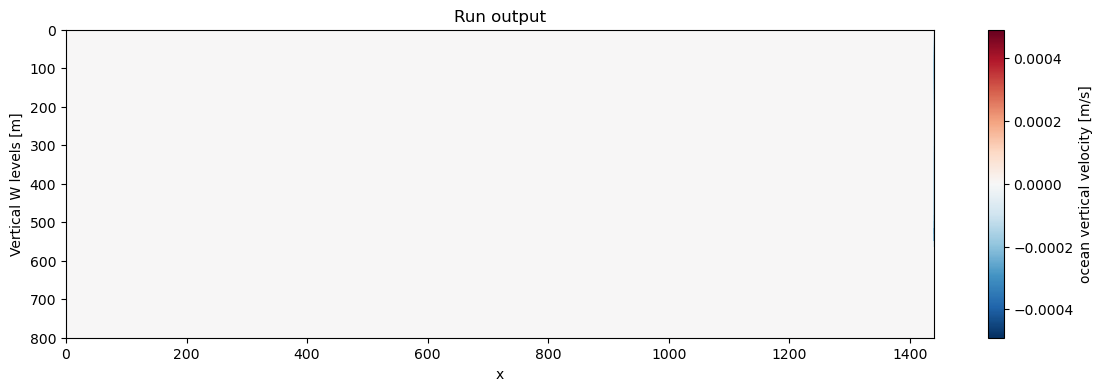

In [46]:
fig, ax = plt.subplots(1,1, figsize=(14,4))

kwags={'xlim':(0,None), 'ylim':(800,0)}
dsW.wo.isel(y=-2, time_counter=10).plot(**kwags)

ax.set_title('Run output')